In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm                   #new GUI version for epoch progress bar
# from tqdm import tqdm                          #old GUI version for epoch progress bar

In [2]:
torch.cuda.empty_cache()

In [3]:
train_dataset = torchvision.datasets.FashionMNIST(root = '.', train  =True, transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.FashionMNIST(root = '.', train = False, transform = transforms.ToTensor(), download = True)
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 128, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 128, shuffle = False)

In [4]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [5]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [6]:
train_dataset.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
num_classes = len(set(train_dataset.targets.numpy()))
print(num_classes)

10


In [8]:
tmp_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 1, shuffle = True)

for inputs, targets in tmp_loader:
    print(inputs)
    print(inputs.shape)
    print(targets.shape)
    break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0353, 0.5333, 0.5765, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.4510, 0.5843, 0.0980, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2235,
           0.5686, 0.6157, 0.7333, 0.6235, 0.1490, 0.0588, 0.0627, 0.0941,
           0.1922, 0.5529, 0.7333, 0.6118, 0.5412, 0.3569, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6784,
           0.5294, 0.5490, 0.6510, 0.6784, 0.1020, 0.0000, 0.1490, 0.0196,
           0.4078, 0.7020, 0.5961, 0.4941, 0.4510, 0.7098, 0.1725, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1843, 0.6118,
           0.5216, 0.5412, 0.6000, 0.6627, 0.5725, 0.0000, 0.0000, 0.2745,
           0.6196, 0.5843, 0.4627, 0.4745, 

In [9]:
class CNN(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size = 3, stride = 2),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size = 3, stride = 2),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size = 3, stride = 2),
            nn.ReLU()
        )
        self.dense_layers = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(128 * 2 * 2, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, num_classes)
        )
    
    def forward(self, x):
        out = self.conv_layers(x)
        out = out.view(out.size(0), -1)
        out = self.dense_layers(out)
        return out

In [10]:
in_channels = 1
model = CNN(in_channels = in_channels, num_classes = num_classes)

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU()
  )
  (dense_layers): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=512, out_features=512, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [12]:
from torchsummary import summary
summary(model, (1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 128, 2, 2]           --
|    └─Conv2d: 2-1                       [-1, 32, 13, 13]          320
|    └─ReLU: 2-2                         [-1, 32, 13, 13]          --
|    └─Conv2d: 2-3                       [-1, 64, 6, 6]            18,496
|    └─ReLU: 2-4                         [-1, 64, 6, 6]            --
|    └─Conv2d: 2-5                       [-1, 128, 2, 2]           73,856
|    └─ReLU: 2-6                         [-1, 128, 2, 2]           --
├─Sequential: 1-2                        [-1, 10]                  --
|    └─Dropout: 2-7                      [-1, 512]                 --
|    └─Linear: 2-8                       [-1, 512]                 262,656
|    └─ReLU: 2-9                         [-1, 512]                 --
|    └─Dropout: 2-10                     [-1, 512]                 --
|    └─Linear: 2-11                      [-1, 10]                  5,13

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 128, 2, 2]           --
|    └─Conv2d: 2-1                       [-1, 32, 13, 13]          320
|    └─ReLU: 2-2                         [-1, 32, 13, 13]          --
|    └─Conv2d: 2-3                       [-1, 64, 6, 6]            18,496
|    └─ReLU: 2-4                         [-1, 64, 6, 6]            --
|    └─Conv2d: 2-5                       [-1, 128, 2, 2]           73,856
|    └─ReLU: 2-6                         [-1, 128, 2, 2]           --
├─Sequential: 1-2                        [-1, 10]                  --
|    └─Dropout: 2-7                      [-1, 512]                 --
|    └─Linear: 2-8                       [-1, 512]                 262,656
|    └─ReLU: 2-9                         [-1, 512]                 --
|    └─Dropout: 2-10                     [-1, 512]                 --
|    └─Linear: 2-11                      [-1, 10]                  5,13

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [14]:
total_len = (len(train_loader) + len(test_loader))
total_len

548

In [15]:
n_epochs = 15
train_losses = np.zeros(n_epochs)
train_accuracies = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
test_accuracies = np.zeros(n_epochs)

for epoch in range(n_epochs):
    epoch_str = str(epoch + 1).rjust(len(str(n_epochs)), " ")
    with tqdm(total = total_len, desc = f"Epoch [ {epoch_str}/{n_epochs} ] : ") as pbar:
        n_correct = 0
        n_total = 0
        train_loss = []
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            _, prediction = torch.max(outputs, 1)
            n_correct += (prediction == targets).sum().item()
            n_total += targets.shape[0]
            loss = criterion(outputs, targets)
            train_loss.append(loss.item())

            loss.backward()
            optimizer.step()
            pbar.update(1)

        train_loss = np.mean(train_loss)
        train_acc_real = n_correct / n_total
        train_losses[epoch] = train_loss
        train_accuracies[epoch] = train_acc_real

        n_correct = 0
        n_total = 0
        test_loss = []
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs_test = model(inputs)
            _, prediction_test = torch.max(outputs_test, 1)
            n_correct += (prediction_test == targets).sum().item()
            n_total += targets.shape[0]

            loss_test = criterion(outputs_test, targets)
            test_loss.append(loss_test.item())
            pbar.update(1)

        test_acc_real = n_correct / n_total
        test_loss = np.mean(test_loss)
        test_losses[epoch] = test_loss
        test_accuracies[epoch] = test_acc_real

        pbar.set_description(f"Epoch [ {epoch_str}/{n_epochs} ] ")
        pbar.set_postfix({'Train Accuracy' : f'{train_acc_real:.4f}', 'Train Loss' : f'{train_loss:.4f}','Test Accuracy' : f'{test_acc_real:.4f}' ,'Test Loss' : f'{test_loss:.4f}'})

Epoch [  1/15 ] :   0%|          | 0/548 [00:00<?, ?it/s]

Epoch [  2/15 ] :   0%|          | 0/548 [00:00<?, ?it/s]

Epoch [  3/15 ] :   0%|          | 0/548 [00:00<?, ?it/s]

Epoch [  4/15 ] :   0%|          | 0/548 [00:00<?, ?it/s]

Epoch [  5/15 ] :   0%|          | 0/548 [00:00<?, ?it/s]

Epoch [  6/15 ] :   0%|          | 0/548 [00:00<?, ?it/s]

Epoch [  7/15 ] :   0%|          | 0/548 [00:00<?, ?it/s]

Epoch [  8/15 ] :   0%|          | 0/548 [00:00<?, ?it/s]

Epoch [  9/15 ] :   0%|          | 0/548 [00:00<?, ?it/s]

Epoch [ 10/15 ] :   0%|          | 0/548 [00:00<?, ?it/s]

Epoch [ 11/15 ] :   0%|          | 0/548 [00:00<?, ?it/s]

Epoch [ 12/15 ] :   0%|          | 0/548 [00:00<?, ?it/s]

Epoch [ 13/15 ] :   0%|          | 0/548 [00:00<?, ?it/s]

Epoch [ 14/15 ] :   0%|          | 0/548 [00:00<?, ?it/s]

Epoch [ 15/15 ] :   0%|          | 0/548 [00:00<?, ?it/s]

In [16]:
model.eval()
n_correct = 0
n_total = 0

for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)

    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1)
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

train_acc_final = n_correct / n_total

n_correct = 0
n_total = 0
for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)

    outputs_test = model(inputs)
    _, predictions_test = torch.max(outputs_test, 1)
    n_correct += (predictions_test == targets).sum().item()
    n_total += targets.shape[0]

test_acc_final = n_correct / n_total

print(f"Train Accuracy : {train_acc_final:.4f}, Test Accuracy : {test_acc_final:.4f}")

Train Accuracy : 0.9526, Test Accuracy : 0.9030


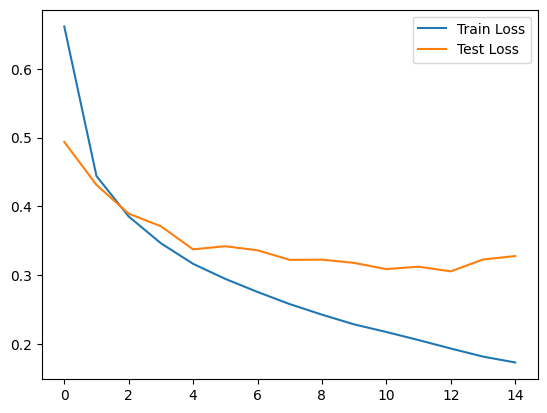

In [17]:
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.legend()
plt.show()

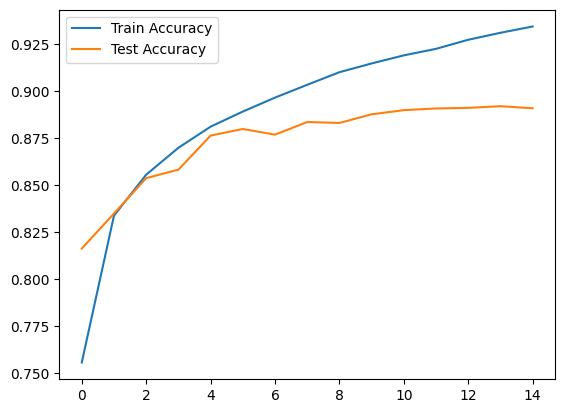

In [18]:
plt.plot(train_accuracies, label = 'Train Accuracy')
plt.plot(test_accuracies, label = 'Test Accuracy')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[849   2  30  20   3   1  89   0   6   0]
 [  0 980   1  13   3   0   1   0   2   0]
 [  8   0 888  12  46   0  46   0   0   0]
 [ 16   6  22 902  37   1  15   0   1   0]
 [  0   1  56  17 866   0  59   0   1   0]
 [  0   0   0   1   0 967   0  23   0   9]
 [116   2  73  25 106   0 669   0   9   0]
 [  0   0   0   0   0   4   0 965   1  30]
 [  1   3   2   2   4   1   6   3 976   2]
 [  1   0   0   0   0   8   0  23   0 968]]


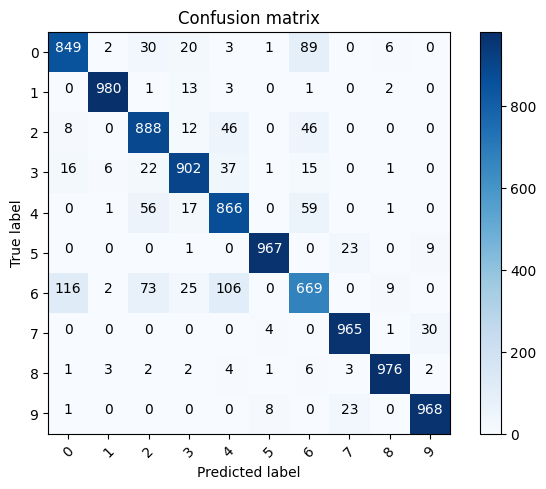

In [20]:
x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])

for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)

    outputs_cm = model(inputs)
    _, prediction_cm = torch.max(outputs_cm, 1)
    p_test = np.concatenate((p_test, prediction_cm.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [21]:
labels = test_dataset.classes
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

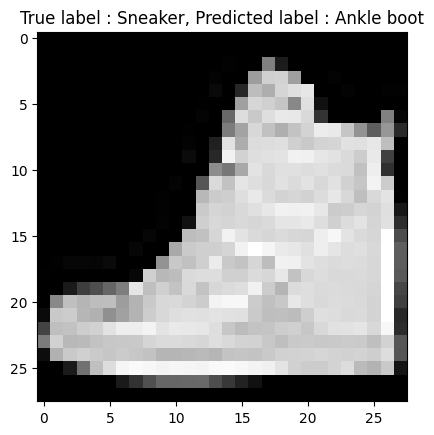

In [22]:
p_test = p_test.astype(np.uint8)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap = 'gray')
plt.title("True label : %s, Predicted label : %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

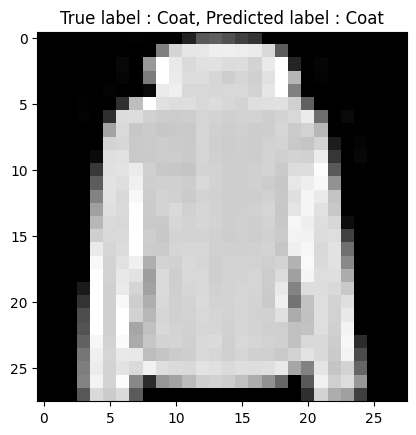

In [23]:
p_test = p_test.astype(np.uint8)
classified_idx = np.where(p_test == y_test)[0]
i_right = np.random.choice(classified_idx)
plt.imshow(x_test[i_right].reshape(28, 28), cmap = 'gray')
plt.title("True label : %s, Predicted label : %s" % (labels[y_test[i_right]], labels[p_test[i_right]]))
plt.show()